In [1]:
# pip install --force-reinstall -v "MNE==0.23.4"


In [24]:
import mne
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis

# Load the EDF file
raw_bg = mne.io.read_raw_edf("fullData/Subject01_1.edf", preload=True)
raw_task = mne.io.read_raw_edf("fullData/Subject01_2.edf", preload=True)
# Print out some basic information about the datasets
# raw_info_bg = raw_bg.info
# raw_info_task = raw_task.info

# raw_info_bg, raw_info_task


Extracting EDF parameters from /Users/sid/Documents/GitHub/EEG analysis/EEG-analysis/Dataset 4/fullData/Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /Users/sid/Documents/GitHub/EEG analysis/EEG-analysis/Dataset 4/fullData/Subject01_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


In [3]:
print(mne.__version__)

0.23.4


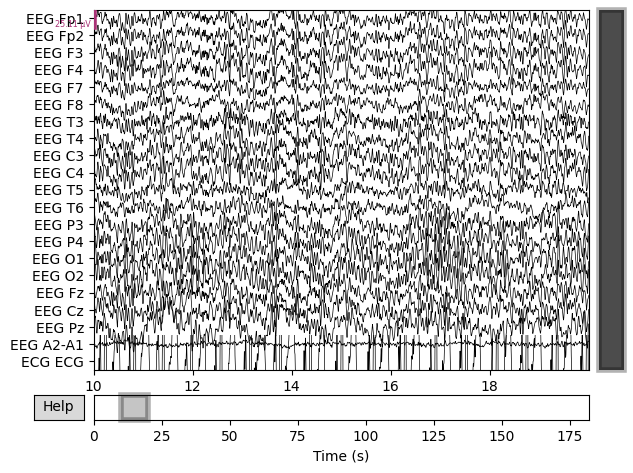

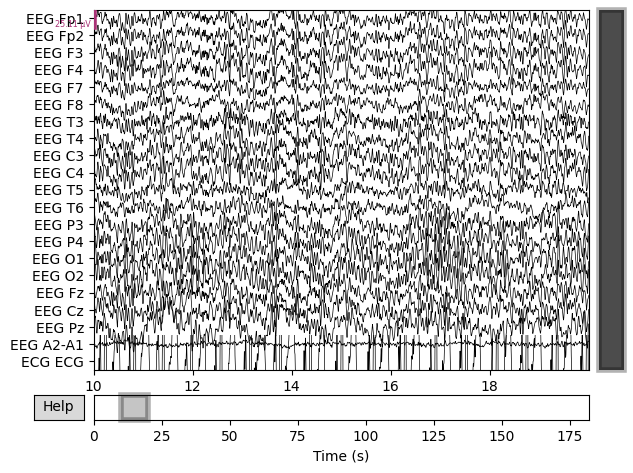

In [4]:
# Plot the raw EEG data for both recordings separately
raw_bg.plot(start=10, duration=10, n_channels=21, scalings="auto", title="Background EEG", show=False)


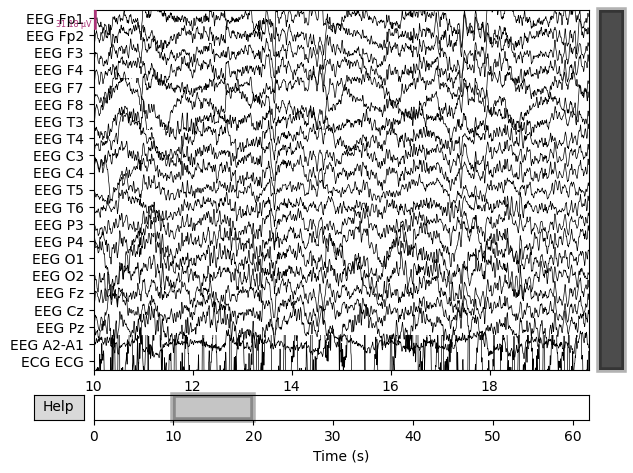

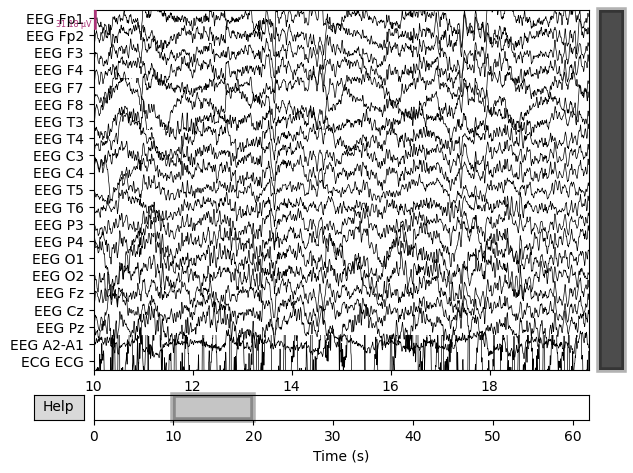

In [5]:
raw_task.plot(start=10, duration=10, n_channels=21, scalings="auto", title="EEG During Task", show=True)


In [6]:
# Filter the EEG data for both recordings
raw_bg_filtered = raw_bg.copy().filter(l_freq=1, h_freq=30)
raw_task_filtered = raw_task.copy().filter(l_freq=1, h_freq=30)

# raw_bg_filtered, raw_task_filtered

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1651 samples (3.302 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge:

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mne/filter.py:1009: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  logger.info('Setting up band-pass filter from %0.2g - %0.2g Hz'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mne/filter.py:1009: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  logger.info('Setting up band-pass filter from %0.2g - %0.2g Hz'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mne/filter.py:1703: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a s

In [7]:
# Compute the PSD for both recordings using the mne.time_frequency.psd_welch function
psd_bg_values, freqs_bg = mne.time_frequency.psd_welch(raw_bg_filtered, fmin=1, fmax=30, n_fft=2048, average='mean', n_overlap=1024, verbose=False)
psd_task_values, freqs_task = mne.time_frequency.psd_welch(raw_task_filtered, fmin=1, fmax=30, n_fft=2048, average='mean', n_overlap=1024, verbose=False)

# Average the PSD values across channels for visualization
avg_psd_bg = psd_bg_values.mean(axis=0)
avg_psd_task = psd_task_values.mean(axis=0)

In [8]:
avg_psd_bg

array([6.94633285e-11, 1.57958863e-10, 6.75305210e-11, 1.87052028e-11,
       1.53526202e-11, 1.89097556e-11, 4.85551299e-11, 8.19552814e-11,
       6.71823332e-11, 2.40037912e-11, 1.21723985e-11, 2.24668749e-11,
       4.46458059e-11, 5.98244974e-11, 4.72526357e-11, 2.88568234e-11,
       1.50936698e-11, 1.43445160e-11, 1.48982967e-11, 1.28686081e-11,
       7.72054618e-12, 4.71718390e-12, 4.88213189e-12, 7.22153031e-12,
       1.07239132e-11, 1.70592832e-11, 2.20622585e-11, 2.34902474e-11,
       2.72787574e-11, 2.43536806e-11, 2.16663827e-11, 1.96760281e-11,
       1.76002430e-11, 1.27081738e-11, 1.09280182e-11, 1.05335435e-11,
       9.98253583e-12, 1.08303942e-11, 1.24949041e-11, 1.18018150e-11,
       1.28343049e-11, 1.43801371e-11, 1.26694175e-11, 1.14114097e-11,
       1.10232238e-11, 8.13949758e-12, 6.84150803e-12, 7.65349485e-12,
       7.11887379e-12, 5.80866473e-12, 5.30216243e-12, 4.56744527e-12,
       4.28845278e-12, 4.51291081e-12, 5.28204473e-12, 5.09974595e-12,
      

In [9]:
np.shape(avg_psd_bg)

(118,)

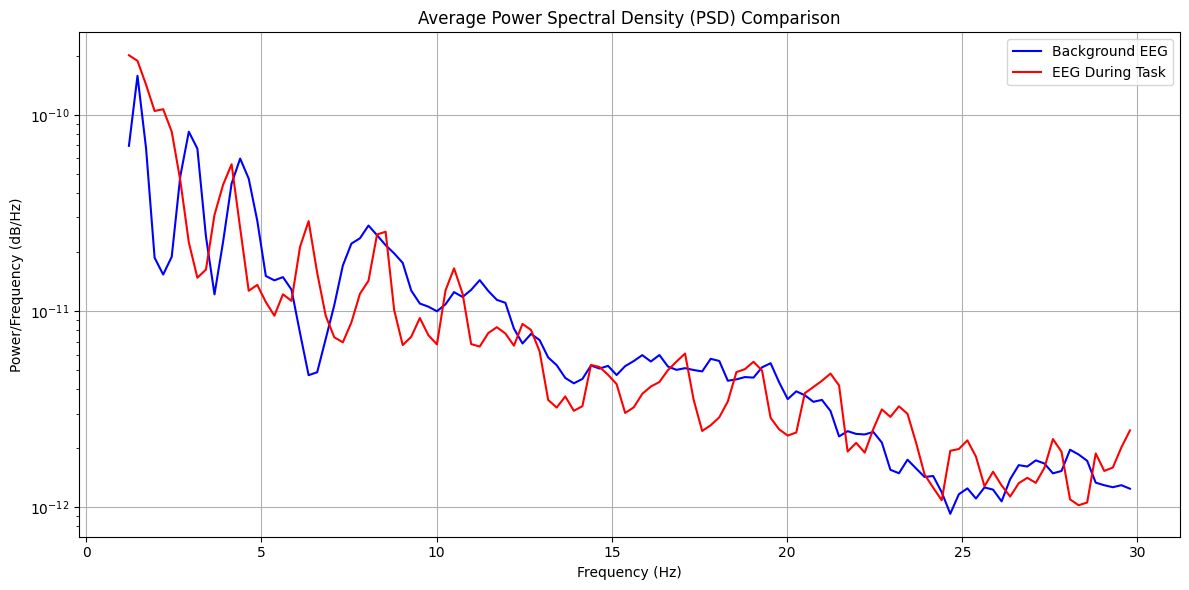

In [10]:
# Plot the averaged PSD values for both recordings
plt.figure(figsize=(12, 6))
plt.semilogy(freqs_bg, avg_psd_bg, label="Background EEG", color='blue')
plt.semilogy(freqs_task, avg_psd_task, label="EEG During Task", color='red')
plt.title('Average Power Spectral Density (PSD) Comparison')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# Adjust epoch parameters for 2 second epochs
tmin, tmax = 0, 2  # 2 second epochs
duration = 2  # Duration of each epoch in seconds
event_id = 1  # This is arbitrary as we are creating non-overlapping epochs

# Create events array for background EEG
events_bg = mne.make_fixed_length_events(raw_bg, id=event_id, duration=duration)
# Epoch the data
epochs_bg = mne.Epochs(raw_bg, events_bg, event_id, tmin, tmax, preload=True, baseline=None)

# Create events array for task EEG
events_task = mne.make_fixed_length_events(raw_task, id=event_id, duration=duration)
# Epoch the data
epochs_task = mne.Epochs(raw_task, events_task, event_id, tmin, tmax, preload=True, baseline=None)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Loading data for 91 events and 1001 original time points ...
1 bad epochs dropped
Not setting metadata
Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated
Loading data for 31 events and 1001 original time points ...
1 bad epochs dropped


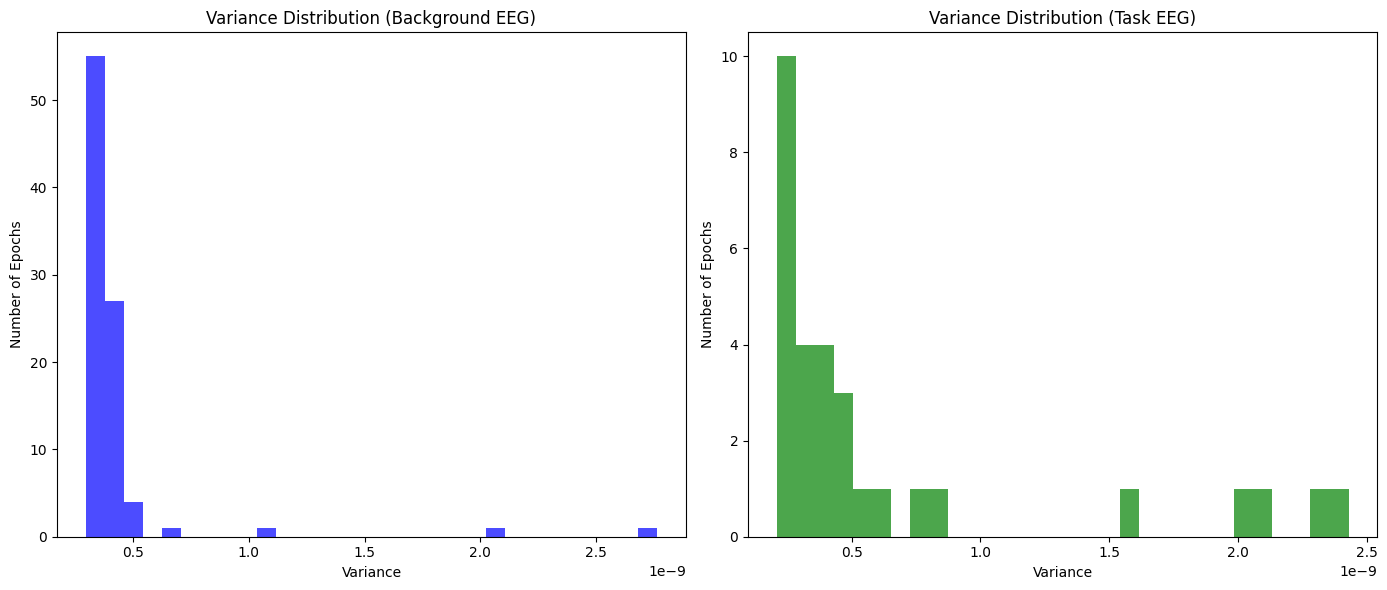

In [12]:
# Compute variance for each epoch
variance_bg = [epoch.var() for epoch in epochs_bg]
variance_task = [epoch.var() for epoch in epochs_task]

# Plot the variance distribution for 2-second epochs
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(variance_bg, bins=30, color='blue', alpha=0.7)
plt.title('Variance Distribution (Background EEG)')
plt.xlabel('Variance')
plt.ylabel('Number of Epochs')

plt.subplot(1, 2, 2)
plt.hist(variance_task, bins=30, color='green', alpha=0.7)
plt.title('Variance Distribution (Task EEG)')
plt.xlabel('Variance')
plt.ylabel('Number of Epochs')

plt.tight_layout()
plt.show()


In [13]:
len(epochs_bg), len(epochs_task)

(90, 30)

In [14]:
# Define the threshold based on the provided limits
threshold_bg = 1e-9
threshold_task = 1e-9

# Reject the outlier epochs based on the variance threshold
outliers_bg = [i for i, var in enumerate(variance_bg) if var > threshold_bg]
outliers_task = [i for i, var in enumerate(variance_task) if var > threshold_task]

# Drop the outlier epochs
epochs_bg_rejected = epochs_bg.drop(indices=outliers_bg, reason='high variance')
epochs_task_rejected = epochs_task.drop(indices=outliers_task, reason='high variance')

len(epochs_bg_rejected), len(epochs_task_rejected)

Dropped 3 epochs: 72, 80, 83
Dropped 5 epochs: 1, 3, 4, 22, 23


(87, 25)

# Feature extraction

## Alpha band

In [15]:
# Filter the data in the alpha band (8-12 Hz)
raw_bg_filtered = raw_bg.filter(8, 12, method='fir')
raw_task_filtered = raw_task.filter(8, 12, method='fir')
# Extract data as numpy arrays for further processing
data_bg = raw_bg_filtered.get_data()
data_task = raw_task_filtered.get_data()

# Compute the Global Field Power (GFP)
gfp_bg = np.std(data_bg, axis=0)
gfp_task = np.std(data_task, axis=0)
# Define number of clusters (commonly 4 for microstate analysis)
n_clusters = 4

# Reduce the number of channels for faster computation
picks_bg = mne.pick_types(raw_bg_filtered.info, eeg=True)
reduced_chs = mne.channels.make_1020_channel_selections(raw_bg_filtered.info, picks_bg)

# Prepare data for clustering
# X_bg = np.dot(np.linalg.pinv(reduced_chs['Left-temporal']['picks']), data_bg[picks_bg])
# X_task = np.dot(np.linalg.pinv(reduced_chs['Left-temporal']['picks']), data_task[picks_bg])


# Skip the channel reduction step and prepare data for clustering
X_bg = data_bg[picks_bg]
X_task = data_task[picks_bg]

# Perform k-means clustering
kmeans_bg = KMeans(n_clusters=n_clusters, random_state=0).fit(X_bg.T)
kmeans_task = KMeans(n_clusters=n_clusters, random_state=0).fit(X_task.T)

# Get the microstate maps (centroids)
maps_bg = kmeans_bg.cluster_centers_
maps_task = kmeans_task.cluster_centers_

# maps_bg, maps_task

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 825 samples (1.650 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mne/filter.py:1009: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  logger.info('Setting up band-pass filter from %0.2g - %0.2g Hz'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mne/filter.py:1009: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  logger.info('Setting up band-pass filter from %0.2g - %0.2g Hz'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mne/filter.py:1703: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a s

In [16]:
def fit_microstates(data, maps):
    """Fit microstate sequence to EEG data."""
    # Assign each time point to the closest microstate map
    activations = np.dot(maps, data)
    assignments = np.argmax(activations, axis=0)
    return assignments

def extract_microstate_features(assignments):
    """Extract microstate features from assignments."""
    n_states = len(np.unique(assignments))
    
    durations = []  # Duration of each microstate
    occurrences = []  # Number of occurrences of each microstate
    for i in range(n_states):
        state_indices = np.where(assignments == i)[0]
        state_durations = np.diff(state_indices)
        durations.append(np.mean(state_durations))
        occurrences.append(len(state_durations))
    
    contributions = [d * o for d, o in zip(durations, occurrences)]  # Contribution of each microstate
    total_duration = sum(contributions)
    contributions = [c / total_duration for c in contributions]
    
    mean_duration = np.mean(durations)
    mean_occurrence = np.mean(occurrences)
    
    return durations, occurrences, contributions, mean_duration, mean_occurrence


In [17]:
# Fit microstate sequence to the EEG data
assignments_bg = fit_microstates(X_bg, maps_bg)
assignments_task = fit_microstates(X_task, maps_task)

# Extract microstate features
durations_bg, occurrences_bg, contributions_bg, mean_duration_bg, mean_occurrence_bg = extract_microstate_features(assignments_bg)
durations_task, occurrences_task, contributions_task, mean_duration_task, mean_occurrence_task = extract_microstate_features(assignments_task)

# Compute mean GFP during each microstate class
def compute_mean_gfp(data, assignments, gfp):
    """Compute mean GFP during each microstate class."""
    mean_gfps = []
    unique_states = np.unique(assignments)
    for state in unique_states:
        indices = np.where(assignments == state)[0]
        mean_gfp = np.mean(gfp[indices])
        mean_gfps.append(mean_gfp)
    return mean_gfps

mean_gfps_bg = compute_mean_gfp(X_bg, assignments_bg, gfp_bg)
mean_gfps_task = compute_mean_gfp(X_task, assignments_task, gfp_task)

(durations_bg, occurrences_bg, contributions_bg, mean_gfps_bg, mean_duration_bg, mean_occurrence_bg), (durations_task, occurrences_task, contributions_task, mean_gfps_task, mean_duration_task, mean_occurrence_task)


(([807.1, 1.9459153122326776, 2.063705249784473, 1772.2916666666667],
  [110, 46760, 44078, 48],
  [0.24952080628207507,
   0.25573205623289097,
   0.25565617218371806,
   0.23909096530131588],
  [4.079785160805534e-06,
   6.672928437373507e-06,
   6.962627748627064e-06,
   3.800743152145453e-06],
  645.850321807171,
  22749.0),
 ([24.100467289719628,
   2.342729746070133,
   2.1290632946189265,
   16.01969932607569],
  [1284, 13232, 14551, 1929],
  [0.24990712774376952,
   0.25034322355563454,
   0.25018978243664497,
   0.24955986626395105],
  [3.505610267020095e-06,
   6.457087347371517e-06,
   6.065660346231519e-06,
   3.220266486819458e-06],
  11.147989914121094,
  7749.0))

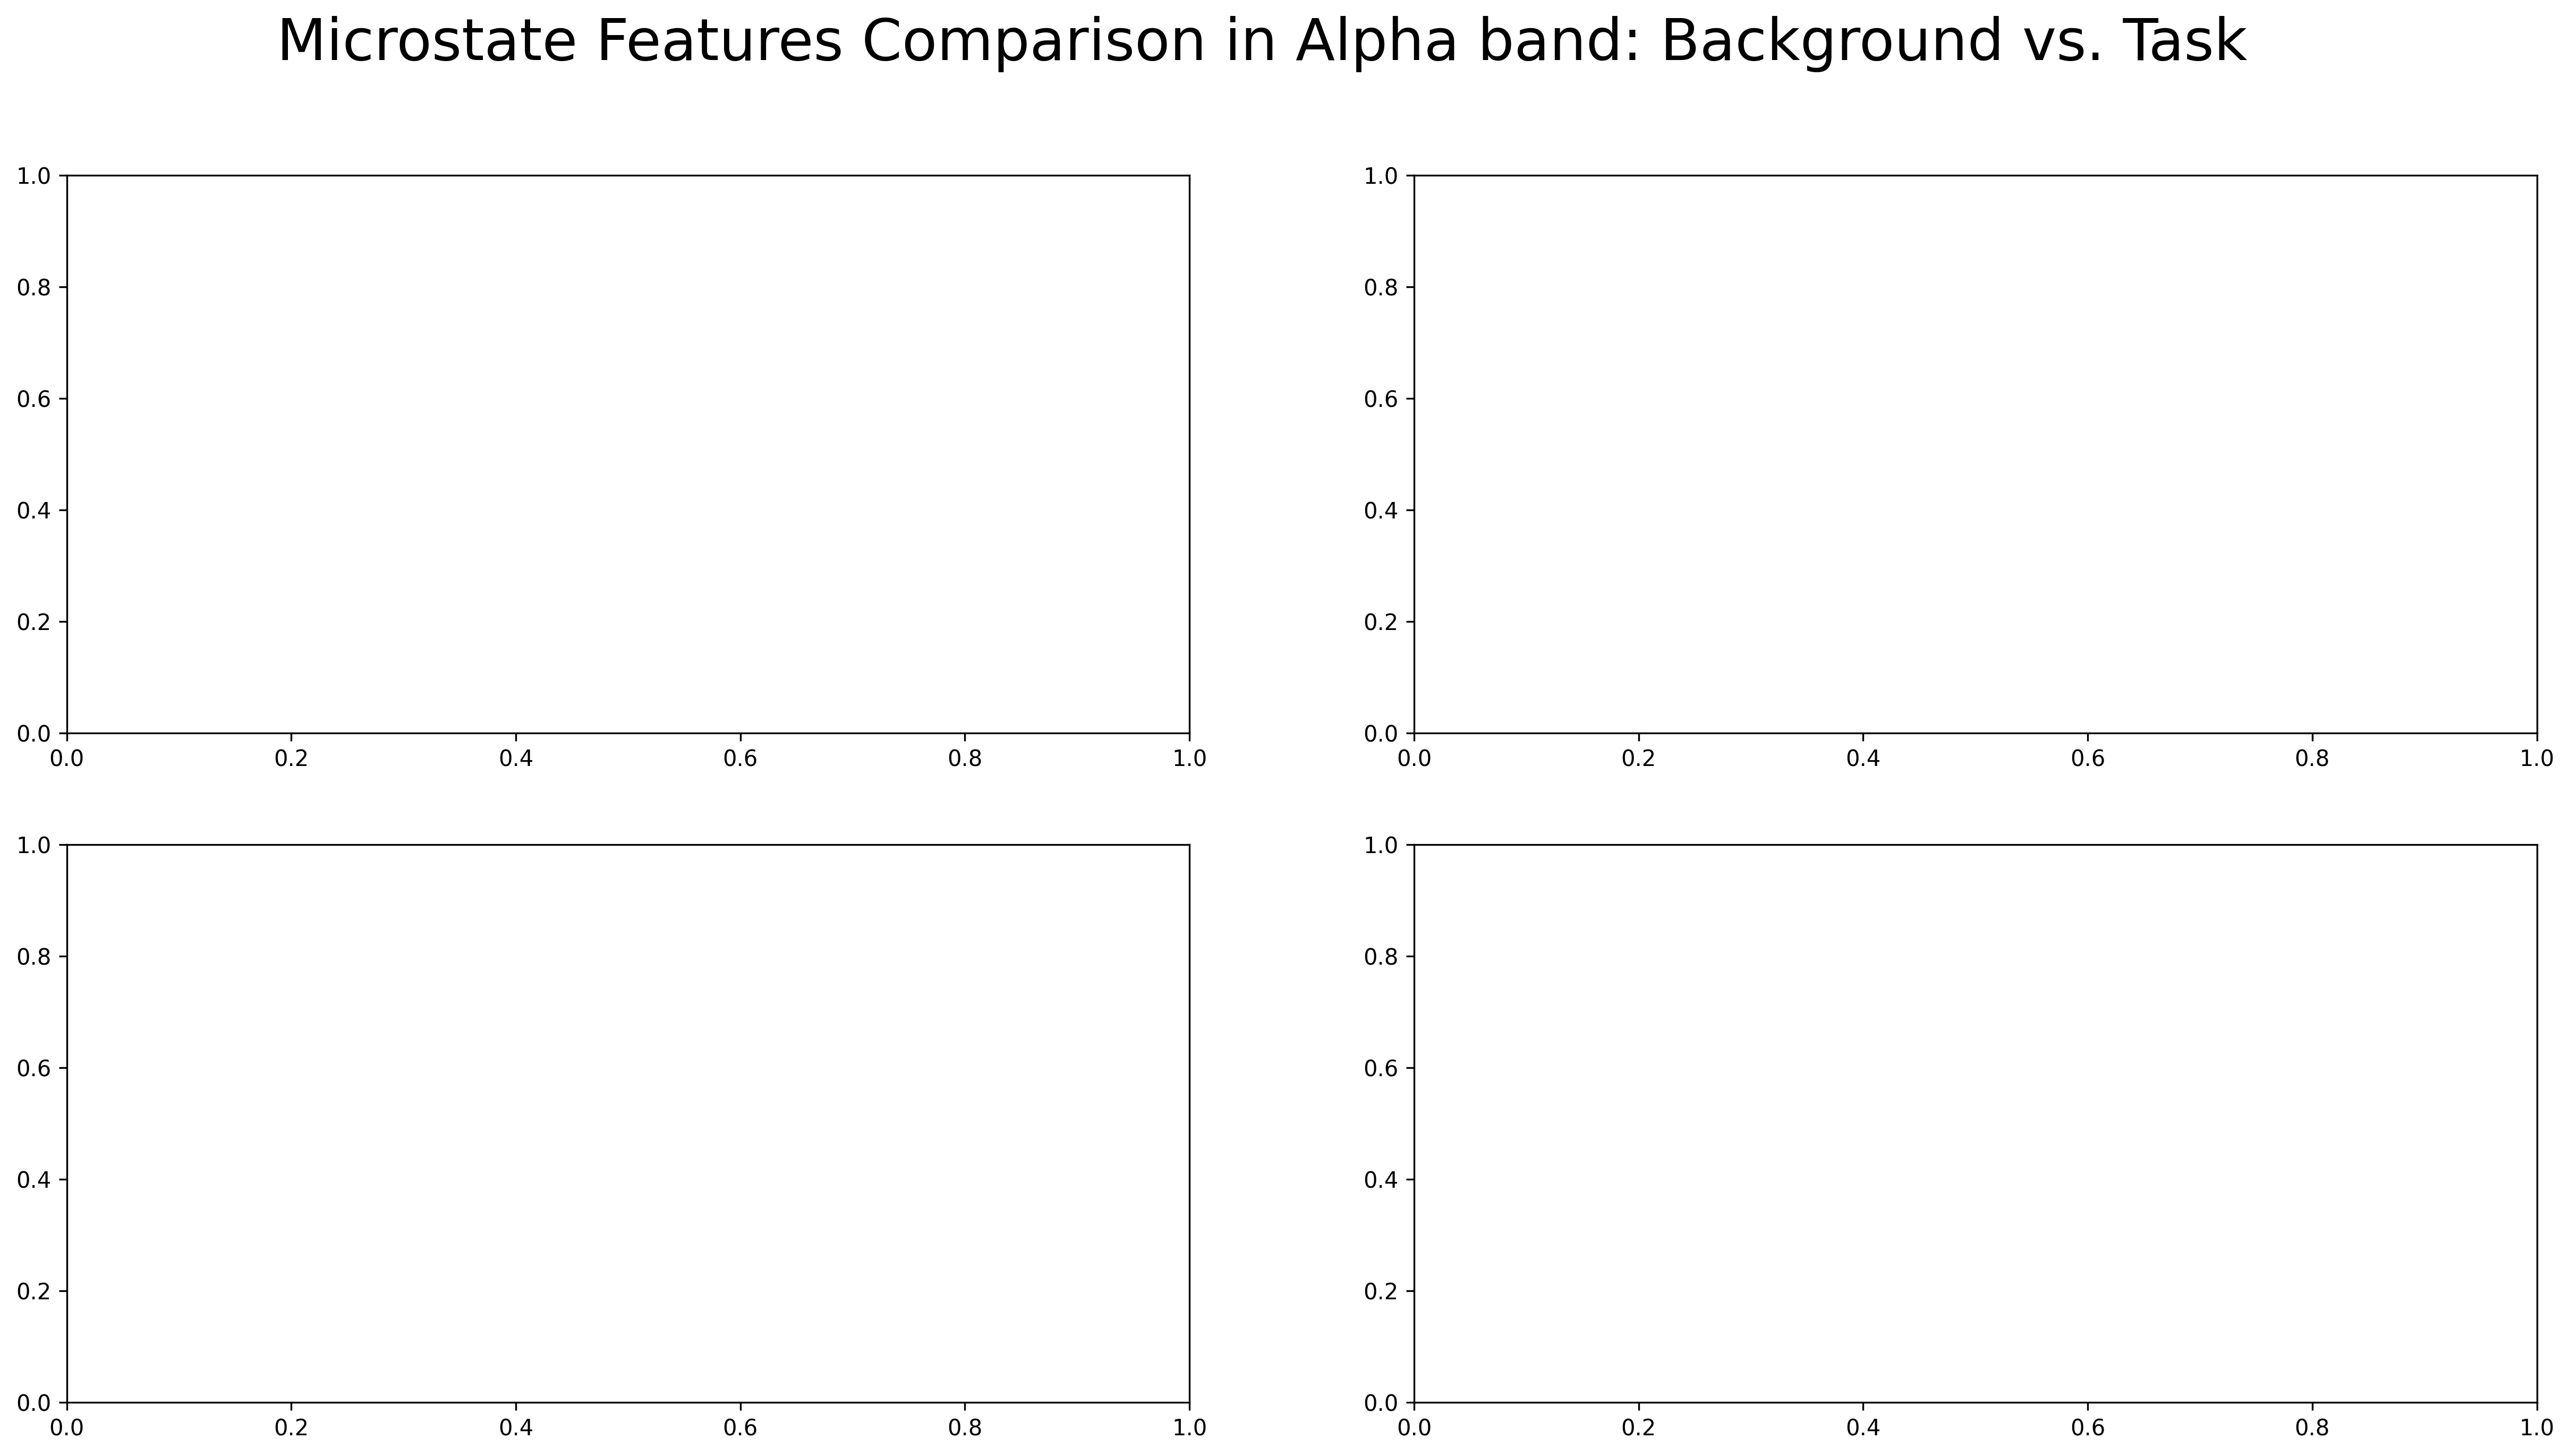

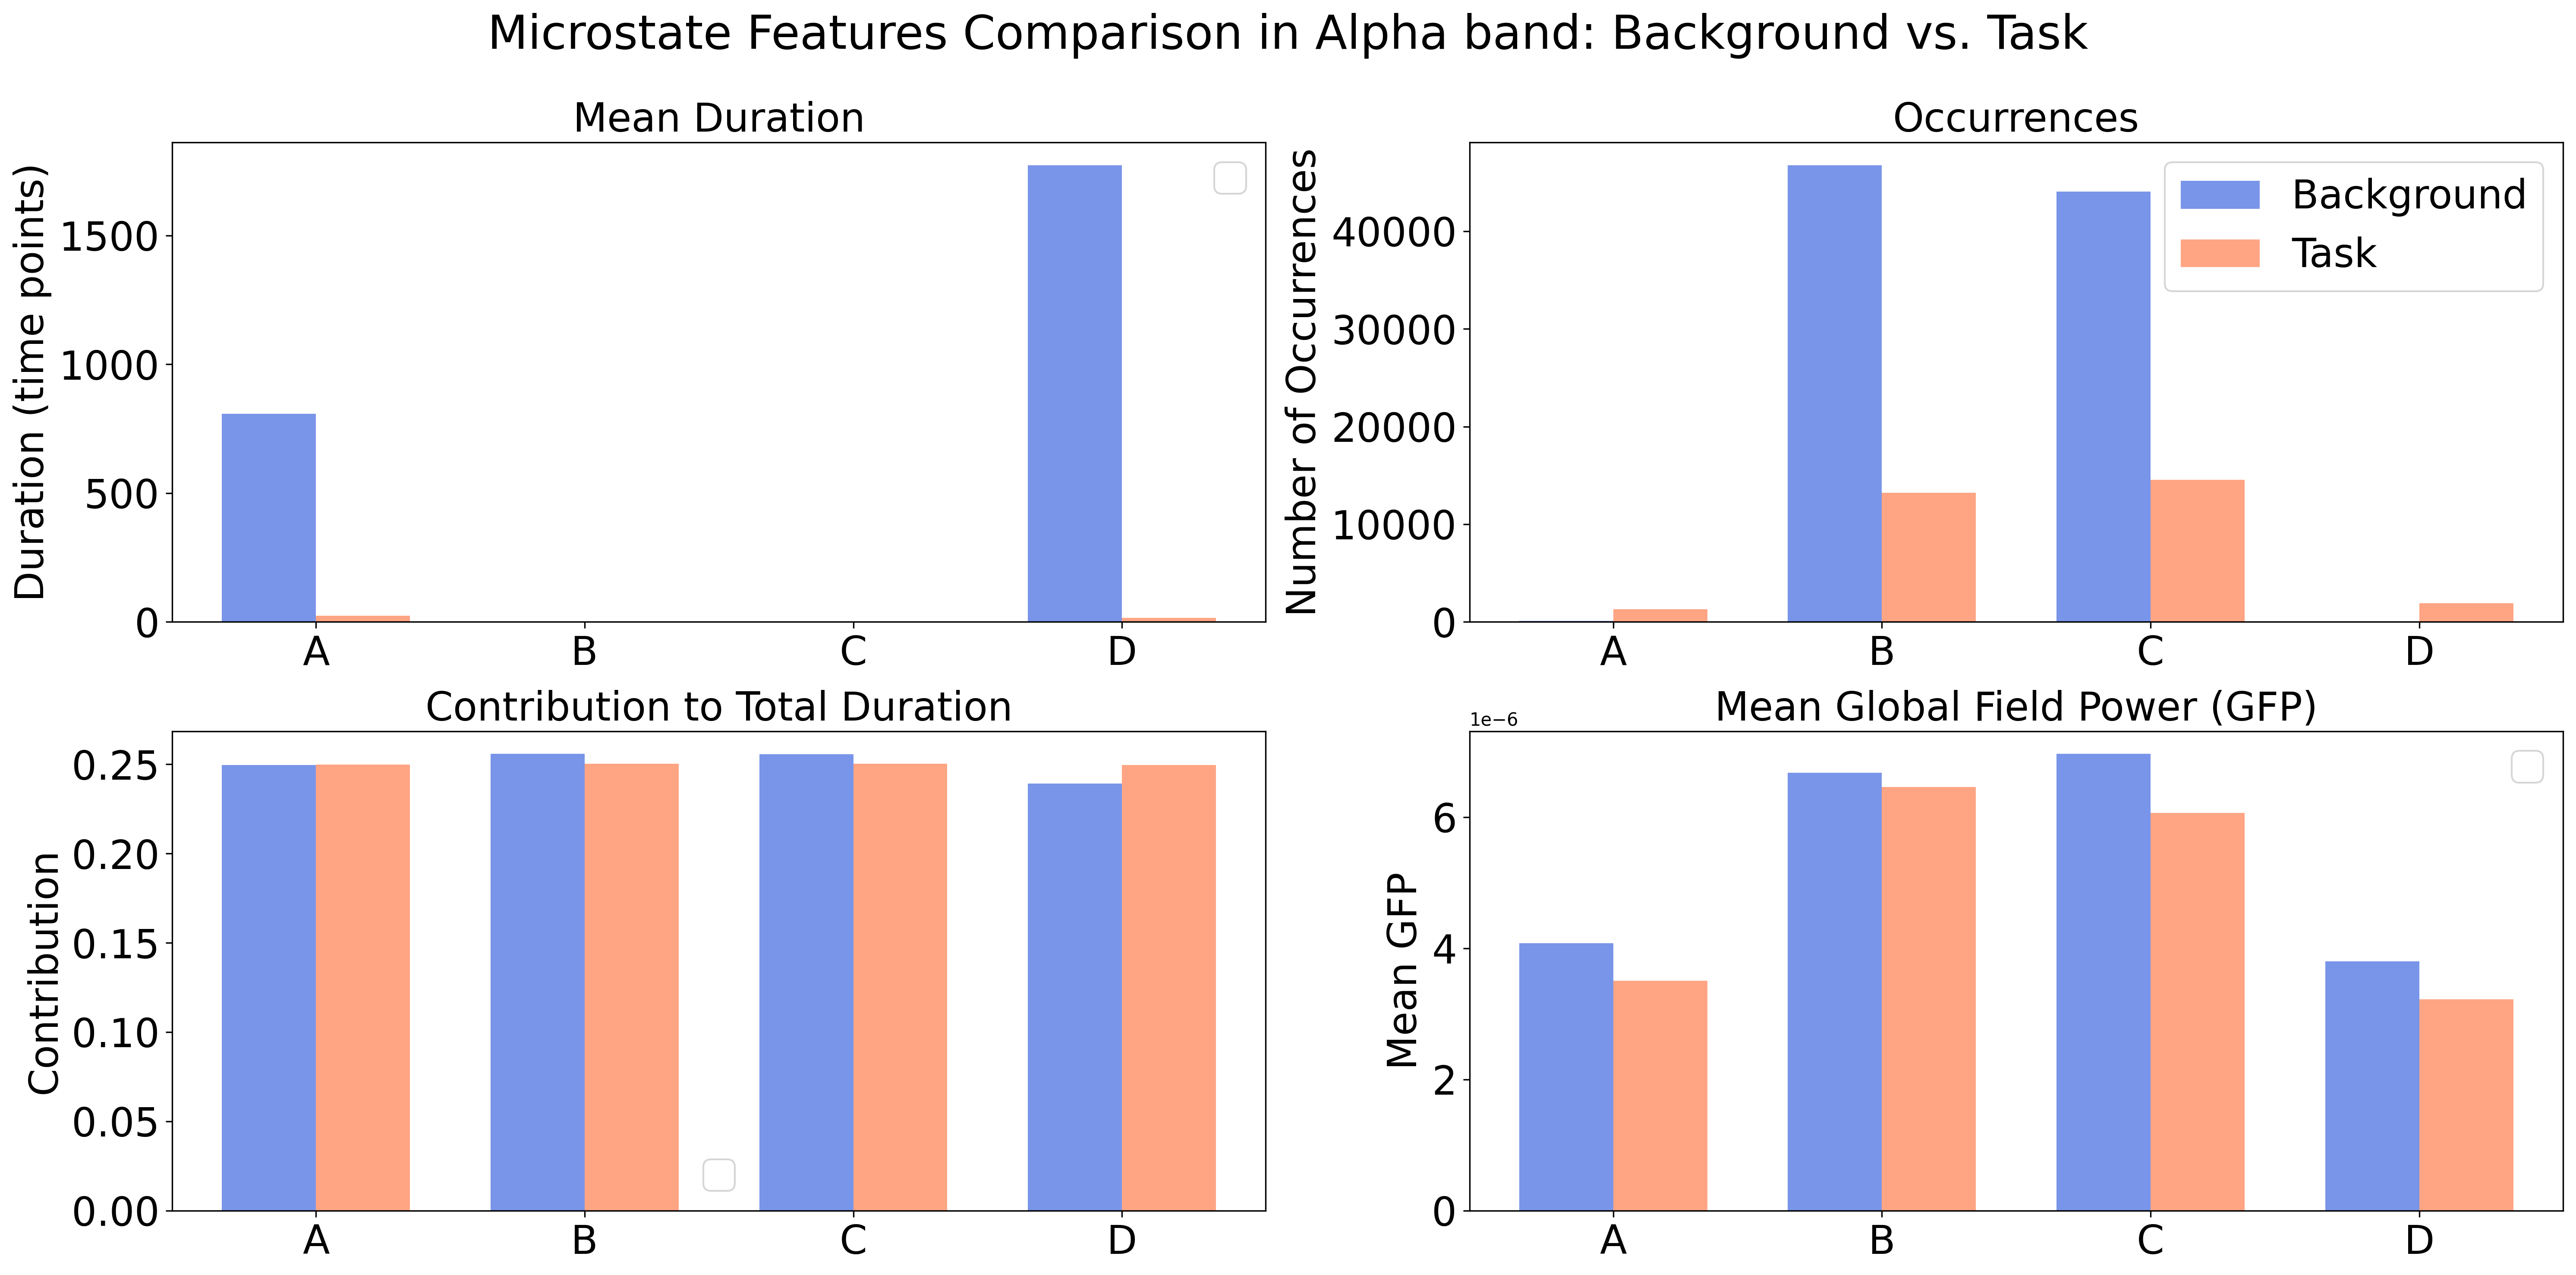

In [19]:
# Define labels for the microstates
labels = ['A', 'B', 'C', 'D']
# Set bar width and positions
bar_width = 0.35
index = np.arange(len(labels))

# Adjusting plot aesthetics
colors = ['royalblue', 'coral']
fontsize = 22

# Adjust the figure size and save the figure again
fig, axs = plt.subplots(2, 2, figsize=(20, 10), dpi=300)
fig.suptitle('Microstate Features Comparison in Alpha band: Background vs. Task', fontsize=26)

# Plot mean durations
axs[0, 0].bar(index, durations_bg, bar_width, alpha=0.7, color=colors[0])
axs[0, 0].bar(index + bar_width, durations_task, bar_width, alpha=0.7, color=colors[1])
axs[0, 0].set_title('Mean Duration', fontsize=fontsize)
axs[0, 0].set_xticks(index + bar_width / 2)
axs[0, 0].set_xticklabels(labels, fontsize=fontsize)
axs[0, 0].set_ylabel('Duration (time points)', fontsize=fontsize)
axs[0, 0].tick_params(axis='both', which='major', labelsize=fontsize)
axs[0, 0].legend(fontsize=fontsize)

# Plot occurrences
axs[0, 1].bar(index, occurrences_bg, bar_width, alpha=0.7, color=colors[0], label='Background')
axs[0, 1].bar(index + bar_width, occurrences_task, bar_width, alpha=0.7, color=colors[1], label='Task')
axs[0, 1].set_title('Occurrences', fontsize=fontsize)
axs[0, 1].set_xticks(index + bar_width / 2)
axs[0, 1].set_xticklabels(labels, fontsize=fontsize)
axs[0, 1].set_ylabel('Number of Occurrences', fontsize=fontsize)
axs[0, 1].tick_params(axis='both', which='major', labelsize=fontsize)
axs[0, 1].legend(fontsize=fontsize)

# Plot contributions
axs[1, 0].bar(index, contributions_bg, bar_width, alpha=0.7, color=colors[0])
axs[1, 0].bar(index + bar_width, contributions_task, bar_width, alpha=0.7, color=colors[1])
axs[1, 0].set_title('Contribution to Total Duration', fontsize=fontsize)
axs[1, 0].set_xticks(index + bar_width / 2)
axs[1, 0].set_xticklabels(labels, fontsize=fontsize)
axs[1, 0].set_ylabel('Contribution', fontsize=fontsize)
axs[1, 0].tick_params(axis='both', which='major', labelsize=fontsize)
axs[1, 0].legend(fontsize=fontsize)

# Plot mean GFPs
axs[1, 1].bar(index, mean_gfps_bg, bar_width, alpha=0.7, color=colors[0])
axs[1, 1].bar(index + bar_width, mean_gfps_task, bar_width, alpha=0.7, color=colors[1])
axs[1, 1].set_title('Mean Global Field Power (GFP)', fontsize=fontsize)
axs[1, 1].set_xticks(index + bar_width / 2)
axs[1, 1].set_xticklabels(labels, fontsize=fontsize)
axs[1, 1].set_ylabel('Mean GFP', fontsize=fontsize)
axs[1, 1].tick_params(axis='both', which='major', labelsize=fontsize)
axs[1, 1].legend(fontsize=fontsize)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.88)

# Save the figure
# output_path = "/mnt/data/microstate_features_comparison_reduced.png"
plt.savefig('alpha_allCh.png', dpi=300, format='png', bbox_inches='tight')

plt.show()



# Beta band microstate visualization

In [20]:
# Filter the data in the beta band (12.5-30 Hz)
raw_bg_filtered_beta = raw_bg.filter(12.5, 30, method='fir')
raw_task_filtered_beta = raw_task.filter(12.5, 30, method='fir')
# Extract data as numpy arrays for further processing
data_bg = raw_bg_filtered_beta.get_data()
data_task = raw_task_filtered.get_data()

# Compute the Global Field Power (GFP)
gfp_bg = np.std(data_bg, axis=0)
gfp_task = np.std(data_task, axis=0)
# Define number of clusters (commonly 4 for microstate analysis)
n_clusters = 4

# Reduce the number of channels for faster computation
picks_bg = mne.pick_types(raw_bg_filtered_beta.info, eeg=True)
reduced_chs = mne.channels.make_1020_channel_selections(raw_bg_filtered_beta.info, picks_bg)

# Prepare data for clustering
# X_bg = np.dot(np.linalg.pinv(reduced_chs['Left-temporal']['picks']), data_bg[picks_bg])
# X_task = np.dot(np.linalg.pinv(reduced_chs['Left-temporal']['picks']), data_task[picks_bg])


# Skip the channel reduction step and prepare data for clustering
X_bg = data_bg[picks_bg]
X_task = data_task[picks_bg]

# Perform k-means clustering
kmeans_bg = KMeans(n_clusters=n_clusters, random_state=0).fit(X_bg.T)
kmeans_task = KMeans(n_clusters=n_clusters, random_state=0).fit(X_task.T)

# Get the microstate maps (centroids)
maps_bg = kmeans_bg.cluster_centers_
maps_task = kmeans_task.cluster_centers_

# maps_bg, maps_task

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.50
- Lower transition bandwidth: 3.12 Hz (-6 dB cutoff frequency: 10.94 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 529 samples (1.058 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.50
- Lower transition bandwidth: 3.12 Hz (-6 dB cutoff frequency: 10.94 Hz)
- Upper passband 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mne/filter.py:1009: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  logger.info('Setting up band-pass filter from %0.2g - %0.2g Hz'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mne/filter.py:1009: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  logger.info('Setting up band-pass filter from %0.2g - %0.2g Hz'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mne/filter.py:1703: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a s

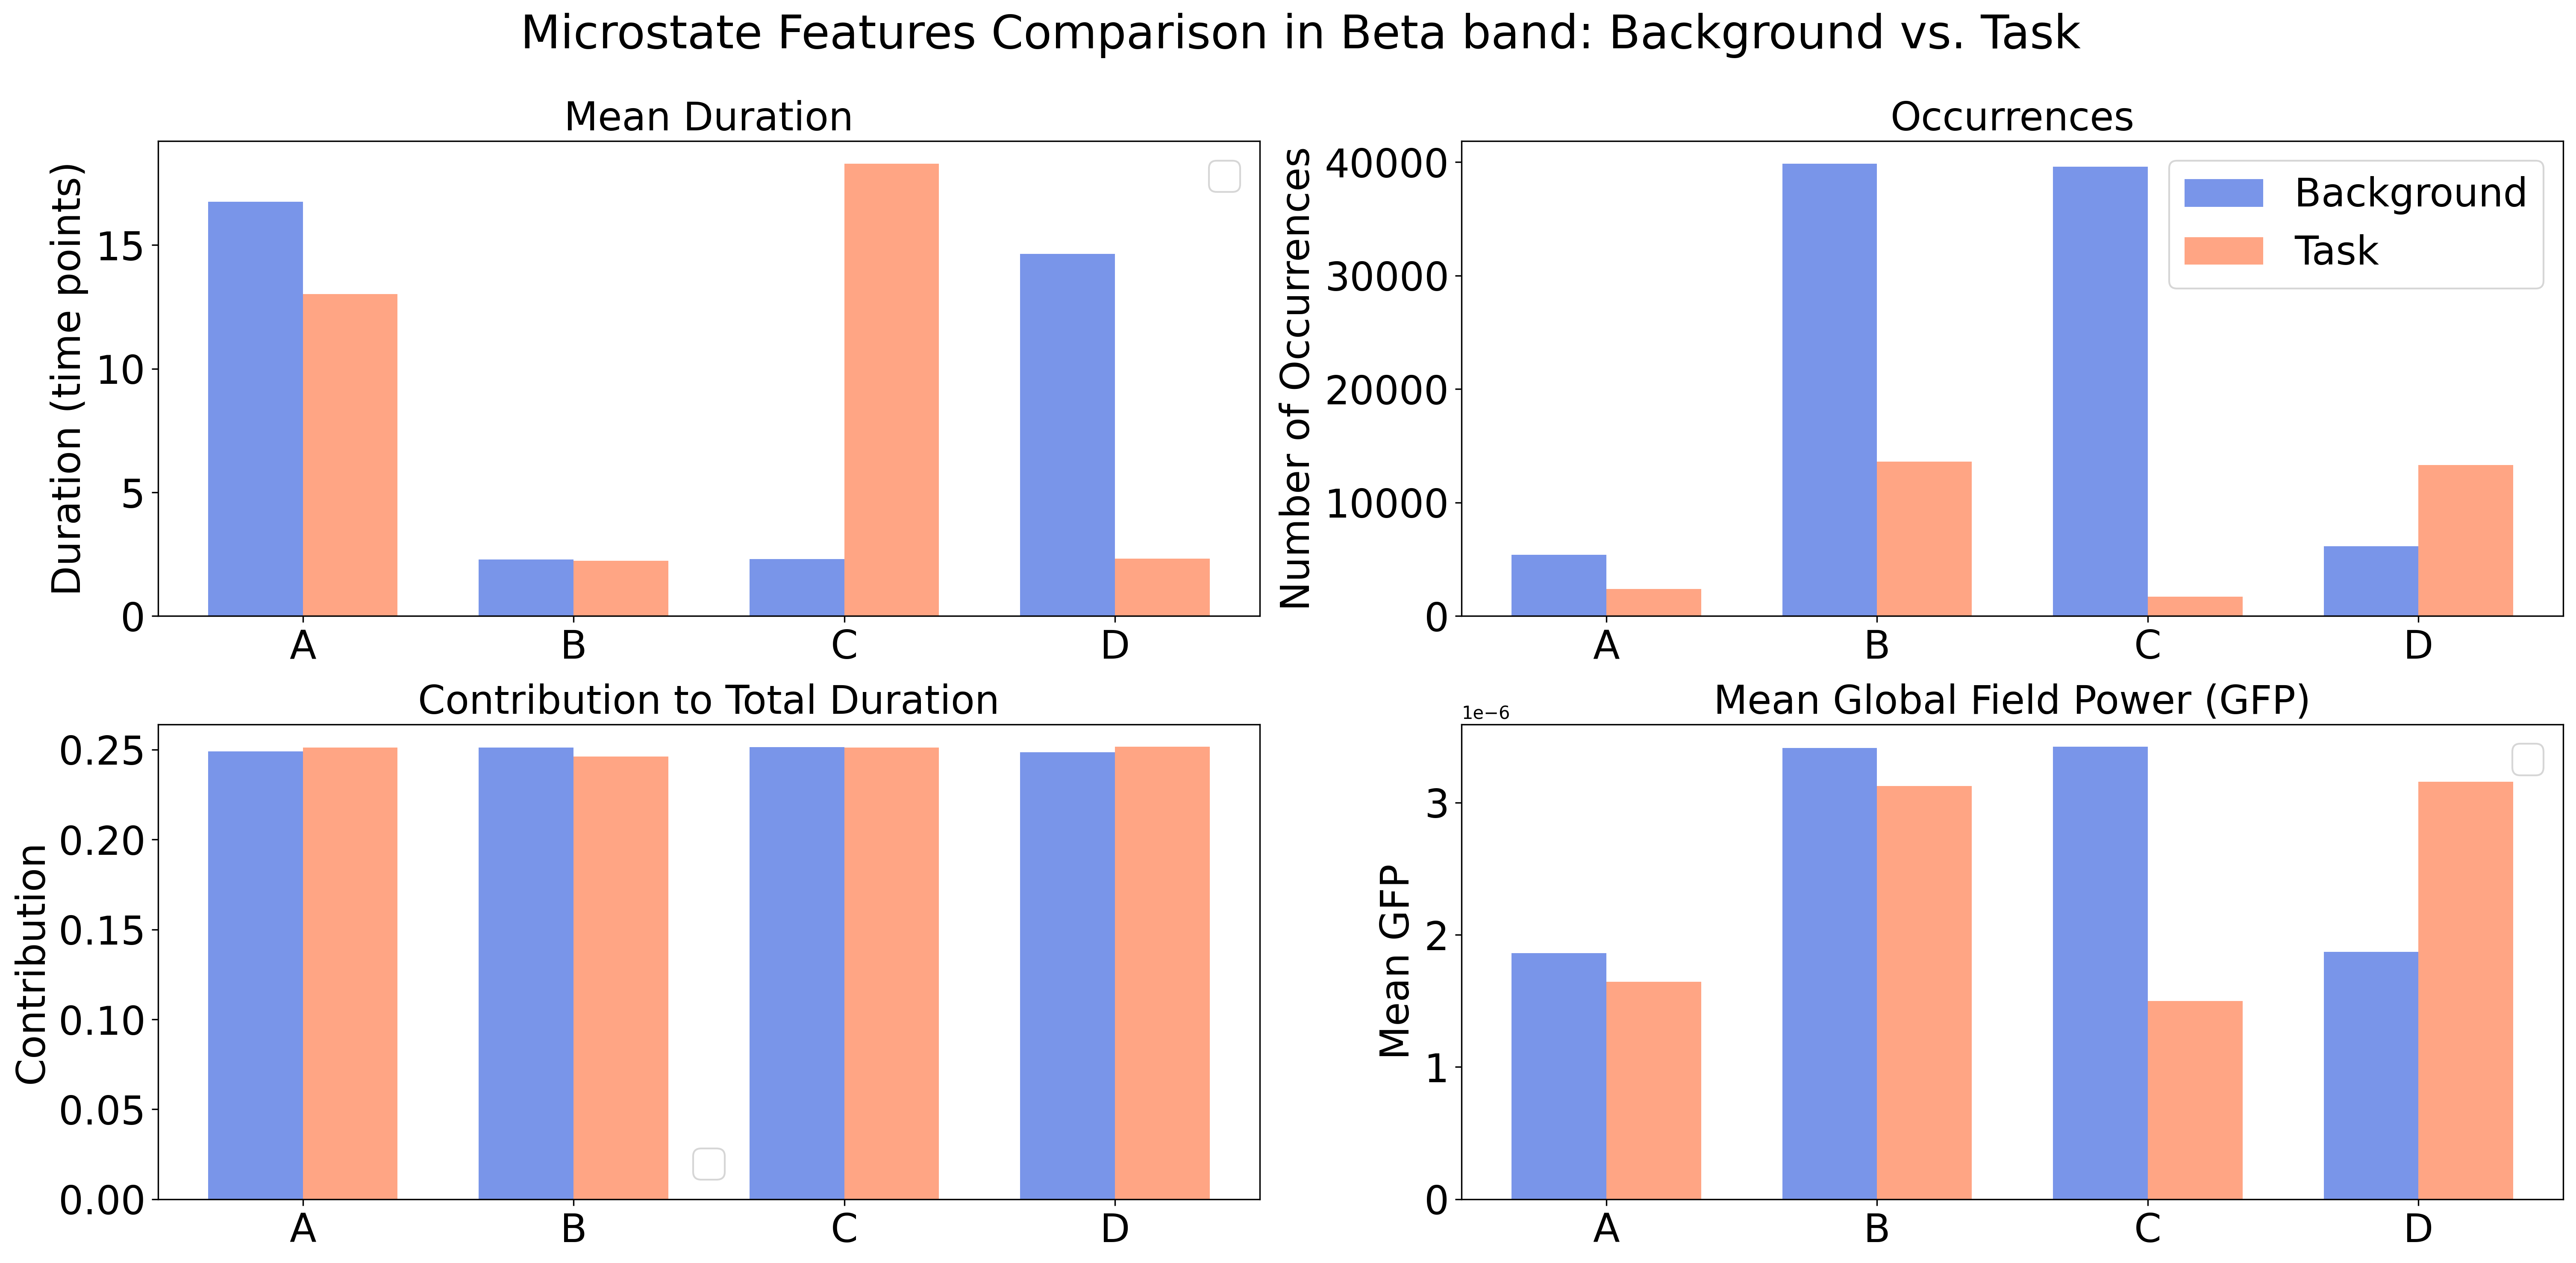

In [22]:
# Fit microstate sequence to the EEG data
assignments_bg = fit_microstates(X_bg, maps_bg)
assignments_task = fit_microstates(X_task, maps_task)

# Extract microstate features
durations_bg, occurrences_bg, contributions_bg, mean_duration_bg, mean_occurrence_bg = extract_microstate_features(assignments_bg)
durations_task, occurrences_task, contributions_task, mean_duration_task, mean_occurrence_task = extract_microstate_features(assignments_task)

mean_gfps_bg = compute_mean_gfp(X_bg, assignments_bg, gfp_bg)
mean_gfps_task = compute_mean_gfp(X_task, assignments_task, gfp_task)

(durations_bg, occurrences_bg, contributions_bg, mean_gfps_bg, mean_duration_bg, mean_occurrence_bg), (durations_task, occurrences_task, contributions_task, mean_gfps_task, mean_duration_task, mean_occurrence_task)


# Adjusting plot aesthetics
colors = ['royalblue', 'coral']
fontsize = 22

# Adjust the figure size and save the figure again
fig, axs = plt.subplots(2, 2, figsize=(20, 10), dpi=300)
fig.suptitle('Microstate Features Comparison in Beta band: Background vs. Task', fontsize=26)

# Plot mean durations
axs[0, 0].bar(index, durations_bg, bar_width, alpha=0.7, color=colors[0])
axs[0, 0].bar(index + bar_width, durations_task, bar_width, alpha=0.7, color=colors[1])
axs[0, 0].set_title('Mean Duration', fontsize=fontsize)
axs[0, 0].set_xticks(index + bar_width / 2)
axs[0, 0].set_xticklabels(labels, fontsize=fontsize)
axs[0, 0].set_ylabel('Duration (time points)', fontsize=fontsize)
axs[0, 0].tick_params(axis='both', which='major', labelsize=fontsize)
axs[0, 0].legend(fontsize=fontsize)

# Plot occurrences
axs[0, 1].bar(index, occurrences_bg, bar_width, alpha=0.7, color=colors[0], label='Background')
axs[0, 1].bar(index + bar_width, occurrences_task, bar_width, alpha=0.7, color=colors[1], label='Task')
axs[0, 1].set_title('Occurrences', fontsize=fontsize)
axs[0, 1].set_xticks(index + bar_width / 2)
axs[0, 1].set_xticklabels(labels, fontsize=fontsize)
axs[0, 1].set_ylabel('Number of Occurrences', fontsize=fontsize)
axs[0, 1].tick_params(axis='both', which='major', labelsize=fontsize)
axs[0, 1].legend(fontsize=fontsize)

# Plot contributions
axs[1, 0].bar(index, contributions_bg, bar_width, alpha=0.7, color=colors[0])
axs[1, 0].bar(index + bar_width, contributions_task, bar_width, alpha=0.7, color=colors[1])
axs[1, 0].set_title('Contribution to Total Duration', fontsize=fontsize)
axs[1, 0].set_xticks(index + bar_width / 2)
axs[1, 0].set_xticklabels(labels, fontsize=fontsize)
axs[1, 0].set_ylabel('Contribution', fontsize=fontsize)
axs[1, 0].tick_params(axis='both', which='major', labelsize=fontsize)
axs[1, 0].legend(fontsize=fontsize)

# Plot mean GFPs
axs[1, 1].bar(index, mean_gfps_bg, bar_width, alpha=0.7, color=colors[0])
axs[1, 1].bar(index + bar_width, mean_gfps_task, bar_width, alpha=0.7, color=colors[1])
axs[1, 1].set_title('Mean Global Field Power (GFP)', fontsize=fontsize)
axs[1, 1].set_xticks(index + bar_width / 2)
axs[1, 1].set_xticklabels(labels, fontsize=fontsize)
axs[1, 1].set_ylabel('Mean GFP', fontsize=fontsize)
axs[1, 1].tick_params(axis='both', which='major', labelsize=fontsize)
axs[1, 1].legend(fontsize=fontsize)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.88)

# Save the figure
# output_path = "/mnt/data/microstate_features_comparison_reduced.png"
plt.savefig('beta_allCh.png', dpi=300, format='png', bbox_inches='tight')

plt.show()

# Channel selection
Some of the brain regions that may be involved in cognitive tasks include the superior parietal cortex, frontal cortex, inferior temporal cortex, dorsolateral prefrontal cortex, and anterior cingulate cortex.

In terms of the 10-20 system, the channels that correspond to these brain regions include:

**Fp1 and Fp2:** These channels are located over the prefrontal cortex, which is part of the frontal lobe.

**F3, F4, F7, and F8:** These channels are located over the frontal lobe.

**T3 and T4:** These channels are located over the temporal lobe.

**C3 and C4:** These channels are located over the central sulcus, which separates the frontal and parietal lobes.

**P3 and P4:** These channels are located over the parietal lobe.

![title](MRI_result.png)

Here, CMR = creative mathematical reasoning and AR =
algorithmic reasoning.

**Ref:** Wirebring, Linnea Karlsson, et al. "An fMRI intervention study of creative mathematical reasoning: behavioral and brain effects across different levels of cognitive ability." Trends in Neuroscience and Education (2022): 100193.

# Conventional feature extraction


![title](Table_methods.png)

**Ref:** Kim, Kyungwon, et al. "EEG microstate features for schizophrenia classification." PloS one 16.5 (2021): e0251842.

In [ ]:
# Extract epochs for the beta band
events = mne.find_events(raw_1, shortest_event=1, stim_channel='STI 014')
epochs_1_beta = mne.Epochs(raw_1, events=events, event_id=event_id, tmin=-0.5, tmax=2, baseline=None, verbose=False)
data_beta = epochs_1_beta.get_data()

# Calculate features for each channel
features = {}
channels = epochs_1.info['ch_names']


# Continue with feature extraction
for index, channel in enumerate(channels):
    # Extract channel data
    channel_data = data_beta_continuous[index, :]
    
    # Calculate the features
    mean_val = np.mean(channel_data)
    variance_val = np.var(channel_data)
    std_dev_val = np.std(channel_data)
    skewness_val = skew(channel_data)
    kurtosis_val = kurtosis(channel_data)
    zero_crossing_rate = np.mean(np.abs(np.diff(channel_data > 0)))
    upper_margin = np.max(channel_data)
    lower_margin = np.min(channel_data)
    width = upper_margin - lower_margin
    asymmetry = (upper_margin - mean_val) / (mean_val - lower_margin)
    coefficient_of_variation = std_dev_val / mean_val
    total_power = np.sum(channel_data**2)
    
    # Store the features for the current channel
    features_beta_continuous[channel] = {
        "Mean": mean_val,
        "Variance": variance_val,
        "Standard Deviation": std_dev_val,
        "Skewness": skewness_val,
        "Kurtosis": kurtosis_val,
        "Zero Crossing Rate": zero_crossing_rate,
        "Upper Margin": upper_margin,
        "Lower Margin": lower_margin,
        "Width": width,
        "Asymmetry": asymmetry,
        "Coefficient of Variation": coefficient_of_variation,
        "Total Power": total_power
    }

features_beta_continuous[channels[0]]  # Display features for the first channel in the beta band as an example